<a href="https://colab.research.google.com/github/satish-tec/ML-Assignment/blob/main/Clustring_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [ ]:

file_path = "/content/drive/MyDrive/Datasets/csv3.csv"
df = pd.read_csv(file_path)

# proper column names
if df.columns[0] != "Weight" or df.columns[1] != "Height":
    df.columns = ["Weight", "Height"]


In [ ]:
print("Dataset preview:\n", df.head())

print("Missing values:\n", df.isnull().sum())

Dataset preview:
       Weight      Height
0  67.062924  176.086355
1  68.804094  178.388668
2  60.930863  170.284496
3  59.733843  168.691992
4  65.431230  173.763679
Missing values:
 Weight    0
Height    0
dtype: int64


In [ ]:
features = ['Weight', 'Height']
X = df[features]

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [ ]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(scaled_data)
centroids = scaler.inverse_transform(kmeans.cluster_centers_)


In [ ]:
# Gaussian Mixture Model Clustering
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data)
means = scaler.inverse_transform(gmm.means_)

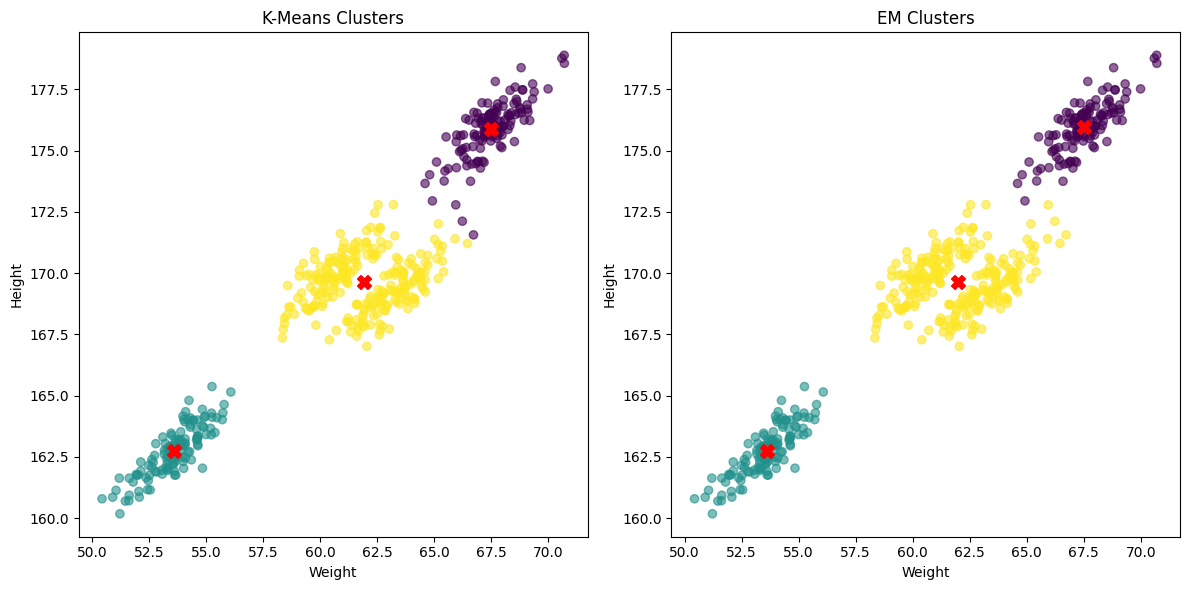

K-Means Silhouette Score: 0.7356847709114219
GMM Silhouette Score: 0.7346809336900739


In [ ]:

plt.figure(figsize=(12, 6))

# K-Means Clusters
plt.subplot(1, 2, 1)
plt.scatter(df['Weight'], df['Height'], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100)
plt.title('K-Means Clusters')
plt.xlabel('Weight')
plt.ylabel('Height')

# EM Clusters
plt.subplot(1, 2, 2)
plt.scatter(df['Weight'], df['Height'], c=gmm_labels, cmap='viridis', alpha=0.6)
plt.scatter(means[:, 0], means[:, 1], c='red', marker='X', s=100)
plt.title('EM Clusters')
plt.xlabel('Weight')
plt.ylabel('Height')

plt.tight_layout()
plt.show()

print("K-Means Silhouette Score:", silhouette_score(X_scaled, kmeans_labels))
print("GMM Silhouette Score:", silhouette_score(X_scaled, gmm_labels))